# Analysis of PSTH stretch
*Nhat Le, November 2017*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline

# Bokeh stuff
# Use IPython widgets for interacting
import ipywidgets

# Import Bokeh modules for interactive plotting
import bkcharts
import bokeh.io
import bokeh.models
import bokeh.palettes
import bokeh.plotting

from sklearn import datasets
# Display graphics in this notebook
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, output_file, show

In [3]:
# List of warp and reconstructed files
warp_files = glob.glob('./*init_linear_warp_affine_warp2.csv')
aligned_files = glob.glob('./*init_linear_warp_affine_recons2.csv')

In [4]:
t_points_short = 7
t_points_long = 9
n_neurons = 105
dt_bin = 40 #ms

# Define palette used in plotting
palette_blue = sns.palettes.color_palette('Blues', t_points_short)
palette_red = sns.palettes.color_palette('Reds', t_points_long)

## Alignment plots

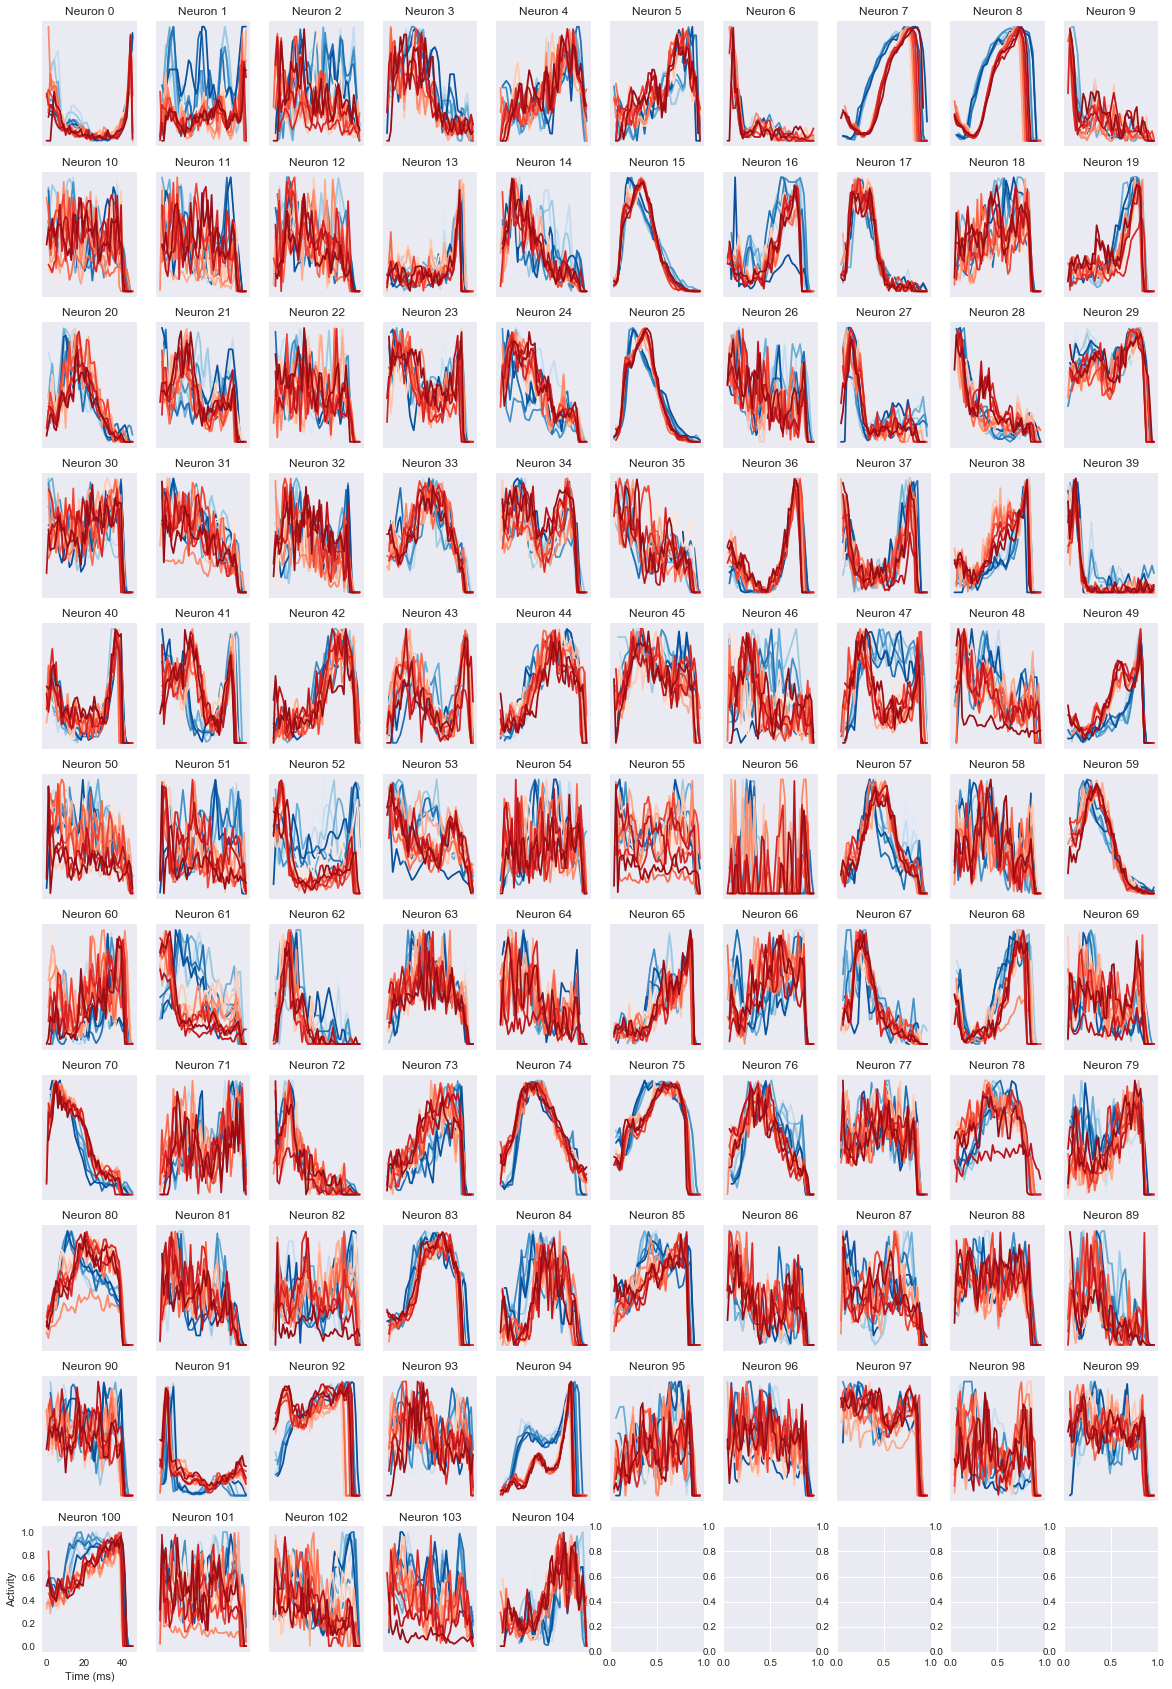

In [5]:
# Plot all alignments
ncols = 10
nrows = 11
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 30))

for i in range(nrows):
    for j in range(ncols):
        neuron_id = ncols * i + j
        if neuron_id >= n_neurons:
            break
        neuron1 = np.loadtxt(aligned_files[neuron_id], delimiter=',')

        for k in range(t_points_short):
            ax[i][j].plot(neuron1[k, :], color=palette_blue[k]);

        for k in range(t_points_long):
            ax[i][j].plot(neuron1[t_points_short + k, :], color=palette_red[k]);    

        ax[i][j].grid(False)
        ax[i][j].set_title('Neuron ' + str(neuron_id))
            
        if i != nrows - 1 or j != 0:
            ax[i][j].set(xticklabels=[], yticklabels=[])
        else:
            ax[i][j].set_xlabel('Time (ms)')
            ax[i][j].set_ylabel('Activity')
    
#filename = 'all_activities_jing105.pdf'
#if not os.path.isfile(filename):
#    plt.savefig(filename)
#else:
#    raise IOError('File exists!')

## Time warp quantification

In [6]:
times = np.array([740, 760, 780, 800, 820, 840, 860, 1300, 1340, 1380, 1420, 1460, 1500, 1540, 1580, 1620])
slopes_arr = np.zeros((n_neurons, times.shape[0]))

for i in range(n_neurons - 1):
    warpN = np.loadtxt(warp_files[i], delimiter=',')
    slopes_arr[i, :] = (warpN[:,-1] - warpN[:,0]) / warpN.shape[1]

C:\Users\Le\Anaconda2\envs\ad\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


[]

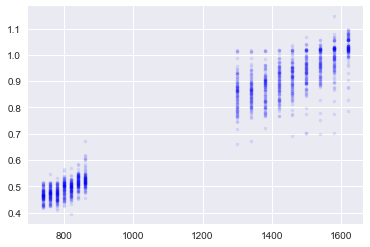

In [7]:
plt.plot(times, (1/slopes_arr).T, 'b.', alpha=0.1);
plt.plot()

In [8]:
p = bokeh.plotting.figure(plot_width=400, plot_height=400, x_range=(0, 1700),
                         y_range=(0, 1.2))
p.circle(times, (1/slopes_arr[0,:]), color='dodgerblue')

p2 = bokeh.plotting.figure(plot_width=400, plot_height=400, x_range=(0, 1700),
                         y_range=(0, 1.2))
p2.circle(times, (1/slopes_arr[1,:]), color='dodgerblue')
slider = bokeh.models.widgets.Slider(start=0, end=105, value=1, step=1, title="Slider")

#slider2 = ipywidgets.IntSlider(min=0, max=n_neurons - 1, value=0)

bokeh.plotting.show(bokeh.layouts.row(p, slider), notebook_handle=True)
def update(frame=0):
    bokeh.io.push_notebook()

ipywidgets.interactive(update, frame=ipywidgets.IntSlider(min=0, max=n_neurons - 1, value=0))



A Jupyter Widget

In [9]:
source = ColumnDataSource(data=dict(x=times, y=1/slopes_arr[0,:], 
                                    store=(1/slopes_arr).tolist()))

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var f = slider_obj.value
    x = data['x']
    y = data['y']
    data['y'] = data['store'][f]
    
    
    source.change.emit();
""")

# Plot
plot = Figure(plot_width=400, plot_height=400, x_range=(0, 1700), y_range=(0, 1))
plot.circle('x', 'y', source=source, line_width=3, line_alpha=0.6)

# Slider
slider = Slider(start=0, end=n_neurons - 1, value=0, step=1, title="power")
callback.args["slider_obj"] = slider

slider.js_on_change('value', callback)

layout = column(slider, plot)

show(layout)

C:\Users\Le\Anaconda2\envs\ad\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\Le\Anaconda2\envs\ad\lib\site-packages\bokeh\models\sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('store', 105), ('x', 16), ('y', 16)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
